In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [49]:
def findWaitingTime(processes, n, bt, wt, quantum,df): 
    rem_bt = [0] * n 
    plot = [0]
    pro = []
     
    for i in range(n): 
        rem_bt[i] = bt[i] 
    t = 0 # Current time 
 
    while(1): 
        done = True
 
        for i in range(n): 

            if (rem_bt[i] > 0) : 
                done = False # There is a pending process 

                if (rem_bt[i] > quantum) : 
                    t += quantum 
                    plot.append(t)
                    pro.append(i)                    
                    rem_bt[i] -= quantum 

                else: 
                    t = t + rem_bt[i] 
                    plot.append(t)
                    pro.append(i)                                        
                    wt[i] = t - bt[i] 
                    rem_bt[i] = 0

        # If all processes are done 
        if (done == True):            
            break
    return plot,pro




def findTurnAroundTime(processes, n, bt, wt, tat,df): 
    for i in range(n): 
        tat[i] = bt[i] + wt[i] 
    


def findavgTime(processes, n, bt, quantum,df): 
    wt = [0] * n 
    tat = [0] * n 



    a,b= findWaitingTime(processes, n, bt, wt, quantum,df) 

    findTurnAroundTime(processes, n, bt, wt, tat,df)
        
    print("Processes    Burst Time     Waiting",  
                     "Time    Turn-Around Time") 
    total_wt = 0
    total_tat = 0
    for i in range(n): 
        total_wt = total_wt + wt[i] 
        total_tat = total_tat + tat[i] 
        print(" ", i + 1, "\t\t", bt[i], 
            "\t\t", wt[i], "\t\t", tat[i]) 

    print("\nAverage waiting time = %.5f "%(total_wt /n) ) 
    print("Average turn around time = %.5f "% (total_tat / n))
    return a,b

def chart(a,b):
    # Declaring a figure "gnt" 
    fig, gnt = plt.subplots() 

    # Setting Y-axis limits 
    gnt.set_ylim(0, 50) 

    # Setting X-axis limits 
    gnt.set_xlim(0, 50) 

    # Setting labels for x-axis and y-axis 
    gnt.set_xlabel('Time') 
    # gnt.set_ylabel('Processes') 

    # Setting ticks on y-axis 
    # gnt.set_yticks(np.arange(0,50,10)) 

    # Labelling tickes of y-axis 
    # gnt.set_yticklabels([1,2,3,4]) 


    # Setting graph attribute
    i = 0

    for x in b:
        if x == 0:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:blue'))
        elif x == 1:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:red'))
        elif x == 2:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:orange'))
        elif x == 3:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:green'))    
        elif x == 4:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:purple'))
        elif x == 5:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:pink'))
        elif x == 6:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:white'))
        elif x == 7:
            gnt.broken_barh([(a[i],a[i+1]-a[i])], (15, 10), facecolors =('tab:brown'))
        i += 1

    plt.legend( df['Processes'] )
    plt.savefig("gantt1.png") 


In [53]:
def details():
    number_of_processes = int(input("Enter Number Of Processes:"))
    bt = []
    for i in range(number_of_processes):
        bt.append(int(input("Enter Burst Time:")))

    data = {
        'Processes': np.arange(1,number_of_processes+1,1),
        'Arrival Time': np.ones(number_of_processes,dtype=int),
        'Burst Time': np.array(bt),
        'Completion Time': np.ones(number_of_processes,dtype=int),
        'Turn Around Time':np.ones(number_of_processes,dtype=int),
        'Waiting Time':np.ones(number_of_processes,dtype=int)
    }

    df = pd.DataFrame(data)
    return df

Enter Number Of Processes:4
Enter Burst Time:23
Enter Burst Time:35
Enter Burst Time:14
Enter Burst Time:13
Processes    Burst Time     Waiting Time    Turn-Around Time
  1 		 23 		 49 		 72
  2 		 35 		 50 		 85
  3 		 14 		 40 		 54
  4 		 13 		 42 		 55

Average waiting time = 45.25000 
Average turn around time = 66.50000 


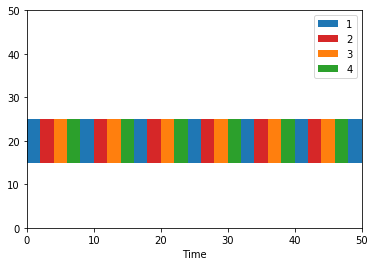

In [54]:
# Driver code 
if __name__ =="__main__": 
	df = details()
	# Process id's 
	proc = df['Processes'].tolist()
	n = len(proc)

	# Burst time of all processes 
	burst_time = df['Burst Time'].tolist() 

	# Time quantum 
	quantum = 2; 
	a,b= findavgTime(proc, n, burst_time, quantum,df) 
chart(a,b)